In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model

In [3]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D())
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [4]:
import pydot
import os
os.environ["PATH"]+= os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

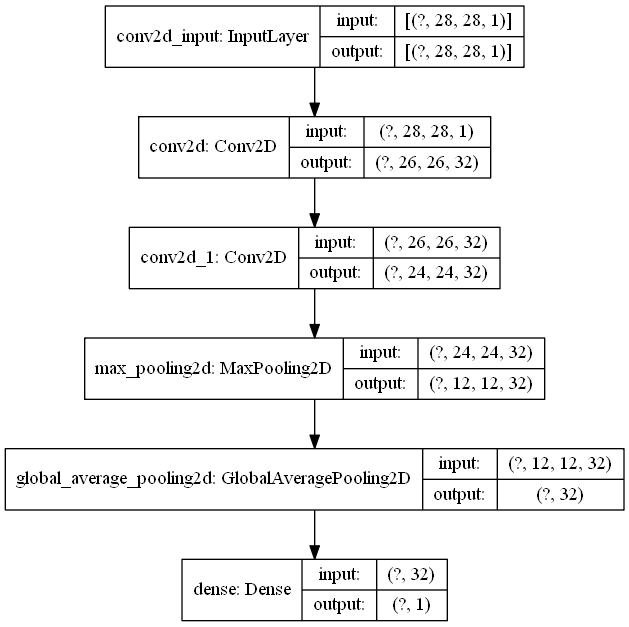

In [5]:
plot_model(model, show_shapes=True)

* 함수형 : 입력/출력 형식으로 무엇을 할지에 대한 기술...

y=f(X) : conv -> conv -> maxpool -> averpool -< dens

In [71]:
# 함수형 모델을 만들기 위한 Model 메소드 불러오기...
from tensorflow.keras.models import Model

# 각기 층들에 필요한 레이어 종류들...
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input

# 설계도를 이쁘게 그림으로 시각화...
from tensorflow.keras.utils import plot_model

In [7]:
# 입력레이어 설계...
inputs_layer = Input(shape=(32,32,3))

# 히든 레이어 설계...( 출력 = Conv2D(~~~)[기능](입력) )
x = Conv2D(32,(3,3),activation="relu")(inputs_layer)
x = Conv2D(32,(3,3),activation="relu")(x)
x = MaxPooling2D()(x)
x = GlobalAveragePooling2D()(x)
x = Dense(1,activation="sigmoid")(x)

model = Model(inputs = inputs_layer, outputs = x)

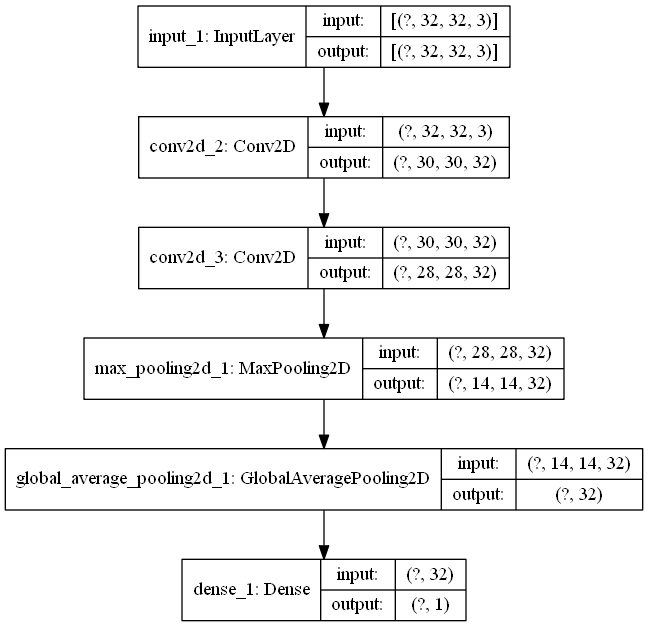

In [10]:
plot_model(model, show_shapes=True)

In [13]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [12]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,
                                                  test_size=0.3,
                                                  random_state=1234)

In [15]:
print(x_train.shape)
print(x_val.shape)

(42000, 28, 28)
(18000, 28, 28)


In [16]:
x_train = x_train.reshape(-1,28,28,1) / 255   # -1 : 자동으로 계산
x_val = x_val.reshape(-1,28,28,1) / 255
x_test = x_test.reshape(-1,28,28,1) / 255
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(42000, 28, 28, 1)
(18000, 28, 28, 1)
(10000, 28, 28, 1)


In [33]:
print(y_train.shape)

(42000,)


* 함수형

In [24]:
inputs_layer = Input(shape=(28,28,1))
x = Conv2D(32, (3,3), activation="relu")(inputs_layer)
x = Conv2D(32, (3,3), activation="relu")(x)
x = MaxPooling2D()(x)
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation="softmax")(x)
model = Model(inputs = inputs_layer, outputs=x)

In [31]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [32]:
model.fit(x_train,y_train,
          batch_size=32, validation_data=(x_val, y_val),
          epochs=10)

Epoch 1/10
1313/1313 [==============================] - 23s 17ms/step - loss: 1.6675 - accuracy: 0.3959 - val_loss: 1.3286 - val_accuracy: 0.5298
Epoch 2/10
1313/1313 [==============================] - 23s 17ms/step - loss: 1.1595 - accuracy: 0.6196 - val_loss: 1.0034 - val_accuracy: 0.6639
Epoch 3/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.9129 - accuracy: 0.7136 - val_loss: 0.8461 - val_accuracy: 0.7292
Epoch 4/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.7700 - accuracy: 0.7598 - val_loss: 0.6875 - val_accuracy: 0.7949
Epoch 5/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.6806 - accuracy: 0.7874 - val_loss: 0.6304 - val_accuracy: 0.8033
Epoch 6/10
1313/1313 [==============================] - 23s 18ms/step - loss: 0.6202 - accuracy: 0.8051 - val_loss: 0.6555 - val_accuracy: 0.7771
Epoch 7/10
1313/1313 [==============================] - 23s 18ms/step - loss: 0.5699 - accuracy: 0.8230 - val_loss: 0.5230 -

In [34]:
# 레이어를 합치는 concat
from tensorflow.keras.layers  import Concatenate

In [42]:
def inception_made(x):
    x_1 = Conv2D(32, (1,1), activation="relu")(x)
    
    x_2 = Conv2D(48, (1,1), activation="relu")(x)
    x_2 = Conv2D(64, (3,3), activation="relu", padding="same")(x_2)
    
    x_3 = Conv2D(16, (1,1), activation="relu")(x)
    x_3 = Conv2D(16, (5,5), activation="relu", padding="same")(x_3)
    
    x_4 = MaxPooling2D(pool_size=(3,3), strides=1, padding="same")(x)
    x_4 = Conv2D(32, (1,1), activation="relu")(x_4)
    
    output = Concatenate()([x_1, x_2, x_3, x_4])
    output = Dense(10, activation="softmax")(output)
    
    return output

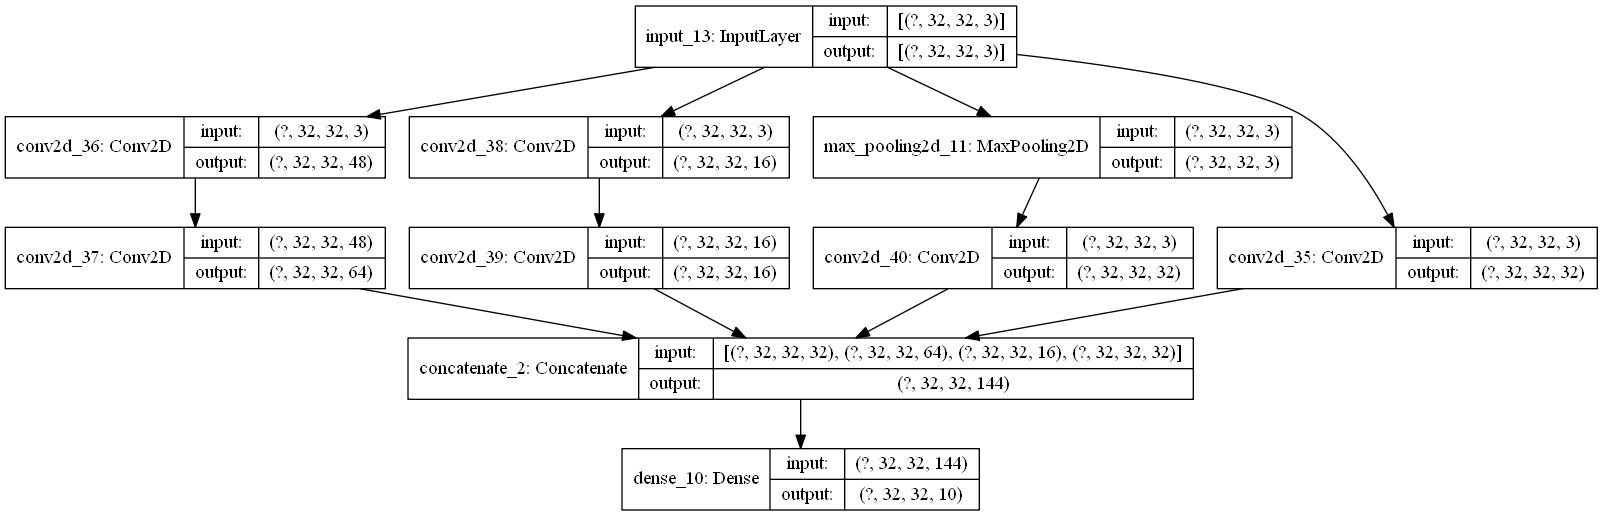

In [43]:
input_layer = Input(shape=(32,32,3))
x = inception_made(input_layer)
model = Model(inputs=input_layer, outputs=x)
plot_model(model, show_shapes=True)

In [44]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 32, 32, 48)   192         input_13[0][0]                   
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 32, 32, 16)   64          input_13[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D) (None, 32, 32, 3)    0           input_13[0][0]                   
_______________________________________________________________________________________

## cifar-10 데이터에 inception 일부 모델만 가지고 설계해보기

In [47]:
from tensorflow.keras.datasets import cifar10

In [48]:
(x_train, y_train),(x_test,y_test)=cifar10.load_data()

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [50]:
import numpy as np
x_mean = np.mean(x_train,axis=(0,1,2))
x_std = np.std(x_train,axis=(0,1,2))

x_train = (x_train-x_mean)/x_std
x_test = (x_test-x_mean)/x_std

In [52]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.3,
                                                  random_state=1234)

In [53]:
print(x_train.shape)
print(x_val.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)


In [69]:
def inception_made(x):
    # 특징 추출 네트워크
    x_1 = Conv2D(32, (1,1), activation="relu")(x)
    x_2 = Conv2D(48, (1,1), activation="relu")(x)
    x_2 = Conv2D(64, (3,3), activation="relu", padding="same")(x_2)    
    x_3 = Conv2D(16, (1,1), activation="relu")(x)
    x_3 = Conv2D(16, (5,5), activation="relu", padding="same")(x_3)    
    x_4 = MaxPooling2D(pool_size=(3,3), strides=1, padding="same")(x)
    x_4 = Conv2D(32, (1,1), activation="relu")(x_4)    
    output = Concatenate()([x_1, x_2, x_3, x_4])
    
    # 추출-분류 연결을 위한 평탄화 네크워트
    output = Flatten()(output)
    
    # 분류 네트워크
    output = Dense(10, activation="softmax")(output)
    
    return output

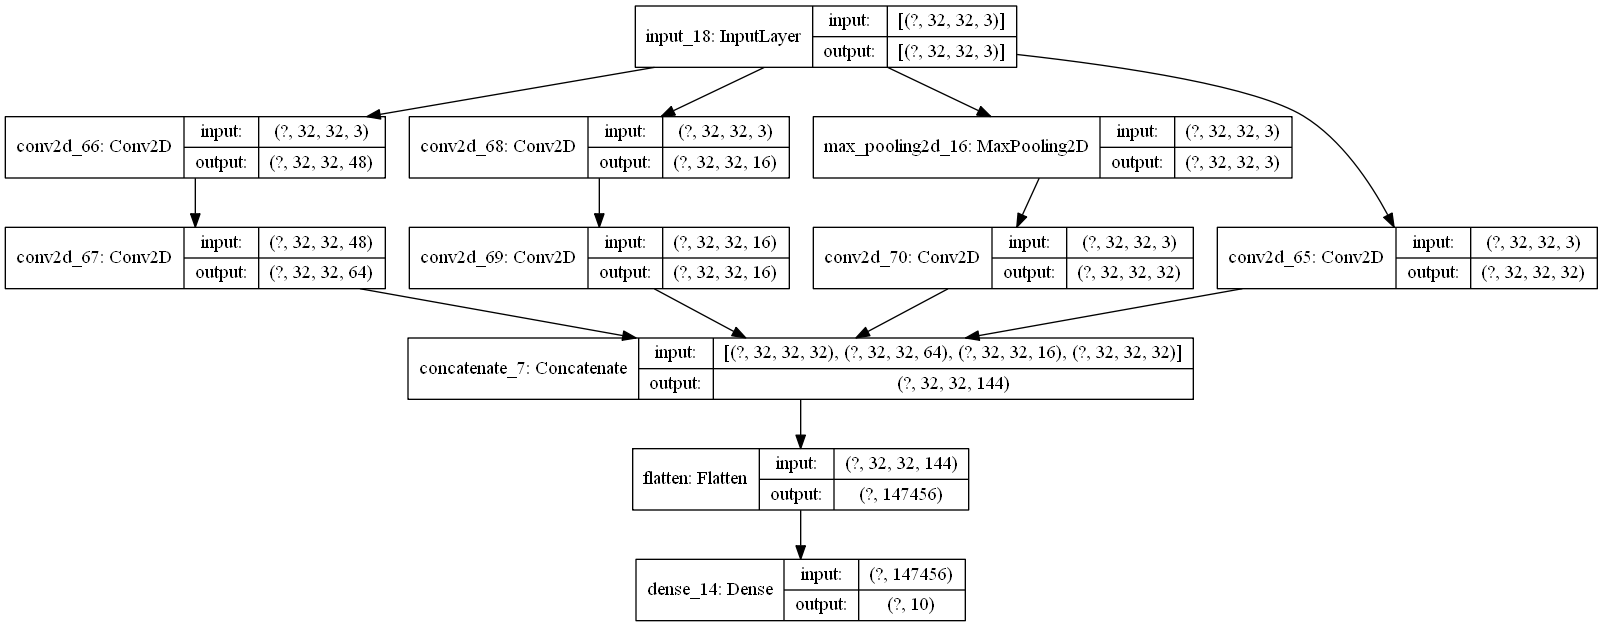

In [72]:
input_layer = Input(shape=(32,32,3))
x = inception_made(input_layer)
model = Model(inputs=input_layer, outputs=x)
plot_model(model, show_shapes=True)

In [73]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [74]:
model.fit(x_train,y_train, batch_size=32, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
1094/1094 [==============================] - 94s 86ms/step - loss: 1.8662 - accuracy: 0.4326 - val_loss: 1.4225 - val_accuracy: 0.5027
Epoch 2/10
1094/1094 [==============================] - 95s 87ms/step - loss: 1.2201 - accuracy: 0.5826 - val_loss: 1.2492 - val_accuracy: 0.5689
Epoch 3/10
1094/1094 [==============================] - 96s 87ms/step - loss: 0.9253 - accuracy: 0.6866 - val_loss: 1.2221 - val_accuracy: 0.5836
Epoch 4/10
1094/1094 [==============================] - 96s 88ms/step - loss: 0.6061 - accuracy: 0.7963 - val_loss: 1.4362 - val_accuracy: 0.5719
Epoch 5/10
1094/1094 [==============================] - 96s 88ms/step - loss: 0.2996 - accuracy: 0.9032 - val_loss: 1.8980 - val_accuracy: 0.5519
Epoch 6/10
1094/1094 [==============================] - 97s 88ms/step - loss: 0.1355 - accuracy: 0.9573 - val_loss: 2.4461 - val_accuracy: 0.5416
Epoch 7/10
1094/1094 [==============================] - 97s 88ms/step - loss: 0.0856 - accuracy: 0.9738 - val_loss: 2.8962 -